# **Rotorcraft Part Failure Investigation**

# Problem Statement
several modes of failure: cracked, leaking, and corrosion. Is there a pattern of conditions leading to a certain failure type?

#  Research Questions

1. Identify and quantify associations between the Failure Type and other variables in the data set.
2. Is failure type linked to a particular operator? Is it only dependent on Flight Hours?

# Data Dictionary and Glossary
1. Aircraft Serial Number - Unique ientifier for a particular aircraft
2. Operator Name - Company that operates the aircraft
3. Operating Region - Region in which aircraft operates
4. Part Serial Number - Unique identifier for a particular part
5. Mean Temerature (F) - Average temperature that the part experienced during its life
6. Mean Humidity (%) - Average humidity that the part experienced during its life
7. Mean Speed (knots) - Average speed that the aircraft flew during that part life
8. Days to removal - Life of part in days
9. Number of landings - Number of landings the aircraft had during the part life
10. Flight Hours - Life of a pat in flight hours
11. Failure Type - Failure mode of part

In [2]:
#importing numpy, matplotlib and pandas, as these packages will be needed to perform the analysis
# Note: to get xlrd to work you will need to make sure it is install--> go to command prompt and type "pip instal"
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from pandas import read_excel

#Importing sklearn package to run logistic/Linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler # for normalization
# Import `train_test_split` from `sklearn.model_selection`
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
# import KNeighborsClassifier from sklearn.neighbors 
from sklearn.neighbors import KNeighborsClassifier
# import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

from sklearn import preprocessing
from imblearn.over_sampling import SMOTE

from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
#from sklearn.pipeline import Pipeline 

In [3]:
# reading in the excel file that contains the necessary data for this analysis
#Since there are multiple sheets in this excel workbook, i am selecting to use the sheet that contains variable scrubs
part_failure_book =pd.read_excel("Aircraft_Part_failure_Extract.xlsx", "Aircraft_Part_Failure_Data_1") 
#Needed to see how messy/clean the data has been read in
part_failure_book.head(5)
#Using tail to get an idea of how big the data set is
part_failure_book.tail(5)
#Determines if there are any missing values in this dataframe
missing_values = part_failure_book.isnull().sum().sum()
print("There are "+ str(missing_values) + " missing values in this data frame")




There are 0 missing values in this data frame


In [52]:
#cleaning up the table to remove the attributes that have scrubbed
del part_failure_book["Part Serial Number"]
del part_failure_book["Flight hours"]
del part_failure_book["Aircraft Serial Number"]
del part_failure_book["Count AC SN"]
del part_failure_book["Count SN"]
part_failure_book.head(5)
#Name swap Cevna to cenva


,Operator Name,Operating Region,SN Scrubbed,Mean Temperature (F),Mean Humidity (%),Mean Speed (knots),Days to removal,Number of landings,FH Scrubbed,Avg FHs/Flight,Failure Type,Failure encoding
0,Iron Bee,Temperate,71202,75.3,66.8,115.61,706,815,715.2,0.877546,Corrosion,1
1,Iron Bee,Temperate,40948,60.7,65.5,135.19,758,822,734.4,0.893431,Corrosion,1
2,Iron Bee,Temperate,73093,67.2,66.5,111.89,866,937,907.2,0.968196,Leaking,3
3,HeliCorp,Temperate,94011,68.9,62.6,146.03,798,615,3153.2,5.127154,Cracked,2
4,HeliCorp,Temperate,87414,75.4,79.2,150.89,833,574,3296.3,5.742683,Corrosion,1


In [53]:

part_failure_book.to_csv('../Aircraft Failure Analysis/Analysis for Tableau.csv')

In [54]:
#Tableau pre proccessing has been complete

In [55]:
#Creating a copy of the dataset as a checkpoint
failure_analysis = part_failure_book.copy(deep = True)

failure_analysis.head(5)

,Operator Name,Operating Region,SN Scrubbed,Mean Temperature (F),Mean Humidity (%),Mean Speed (knots),Days to removal,Number of landings,FH Scrubbed,Avg FHs/Flight,Failure Type,Failure encoding
0,Iron Bee,Temperate,71202,75.3,66.8,115.61,706,815,715.2,0.877546,Corrosion,1
1,Iron Bee,Temperate,40948,60.7,65.5,135.19,758,822,734.4,0.893431,Corrosion,1
2,Iron Bee,Temperate,73093,67.2,66.5,111.89,866,937,907.2,0.968196,Leaking,3
3,HeliCorp,Temperate,94011,68.9,62.6,146.03,798,615,3153.2,5.127154,Cracked,2
4,HeliCorp,Temperate,87414,75.4,79.2,150.89,833,574,3296.3,5.742683,Corrosion,1


HeliCorp           2028
Cenva Transport    2021
BGB Helicopter     2001
XTrans             1993
Iron Bee           1957
Name: Operator Name, dtype: int64


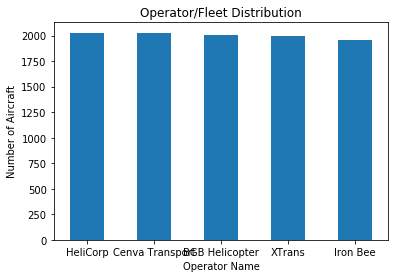

In [56]:
# Creating a bar chart to see the opertor/fleet distrobution
import matplotlib.pyplot as plt
failure_counts = part_failure_book['Operator Name'].value_counts();
print(failure_counts);
part_failure_book['Operator Name'].value_counts().plot(kind='bar');
plt.title('Operator/Fleet Distribution');
plt.ylabel('Number of Aircraft');
plt.xlabel('Operator Name');
plt.xticks(rotation='horizontal');
plt.show()

Corrosion    5266
Leaking      2725
Cracked      2009
Name: Failure Type, dtype: int64


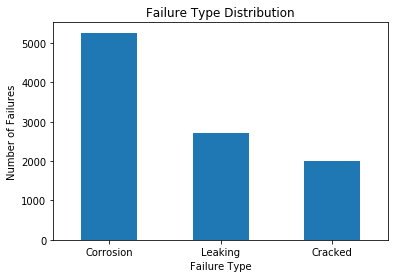

In [57]:
# Creating a bar chart to see the failure type distribution
import matplotlib.pyplot as plt
failure_counts = part_failure_book['Failure Type'].value_counts();
print(failure_counts);
part_failure_book['Failure Type'].value_counts().plot(kind='bar');
plt.title('Failure Type Distribution');
plt.ylabel('Number of Failures');
plt.xlabel('Failure Type');
plt.xticks(rotation='horizontal');
plt.show()

HeliCorp           2028
Cenva Transport    2021
BGB Helicopter     2001
XTrans             1993
Iron Bee           1957
Name: Operator Name, dtype: int64


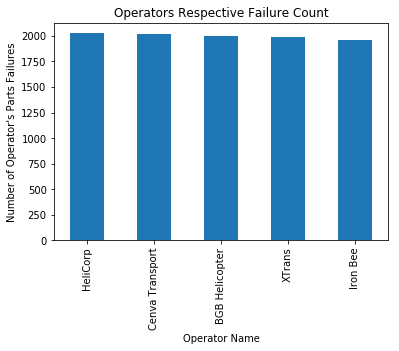

In [58]:
#Creating a bar chart to display operator distribution
operator_counts = part_failure_book['Operator Name'].value_counts();
print(operator_counts);
part_failure_book['Operator Name'].value_counts().plot(kind='bar');
plt.title('Operators Respective Failure Count');
plt.ylabel("Number of Operator's Parts Failures");
plt.xlabel('Operator Name');

#This plot has identified an input error--- Cenva and Cevna Transport are duplicates. Assuming Cevna to be the incorrect operator name. This data will be converted to the correct operator name.

Hot/Wet      2979
Cold         2508
Temperate    2456
Hot/Dry      2057
Name: Operating Region, dtype: int64
10000


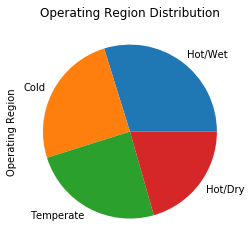

In [59]:
#Creating a pie plot to show Operating Region distribution

region_counts = part_failure_book['Operating Region'].value_counts();
print(region_counts);
total_regions = sum(region_counts)
print(total_regions)
part_failure_book['Operating Region'].value_counts().plot(kind='pie');
plt.title('Operating Region Distribution');

# Corelation Analysis

In [60]:
#Using seaborn an initial corelation analysis will be performed

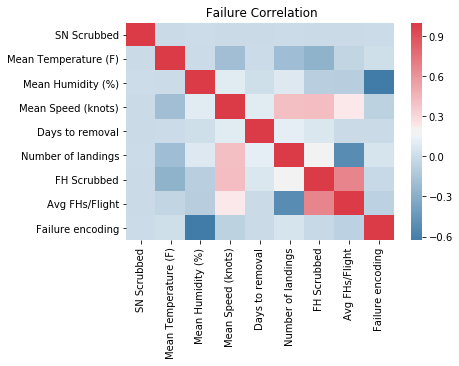

In [61]:
#Creating a heatmap using seaborn to identify any potential relationship between attributes
#This heat map takes Failure type as a lump sum so a dataframe for each failure type will need to be created and stored in a list to run a correlation for each one
import seaborn as sns
correl = failure_analysis.corr()
ax=plt.axes()
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(correl, xticklabels = correl.columns.values, yticklabels = correl.columns.values, cmap=cmap);
ax.set_title(' Failure Correlation');

In [62]:
#Lets see if changing operator name, operating region have any affect on output value

In [63]:
#Creating dummy variables for the failure types
region_dummies = pd.get_dummies(failure_analysis["Operating Region"])  
failure_analysis = pd.concat([failure_analysis,region_dummies],axis=1)

operator_dummies = pd.get_dummies(failure_analysis["Operator Name"])
failure_analysis = pd.concat([failure_analysis,operator_dummies],axis=1)

trail_df = failure_analysis.copy(deep =True)
failure_dummies = pd.get_dummies(failure_analysis["Failure Type"])
failure_analysis= pd.concat([failure_analysis,failure_dummies],axis=1)  

failure_analysis.head(10)

,Operator Name,Operating Region,SN Scrubbed,Mean Temperature (F),Mean Humidity (%),Mean Speed (knots),Days to removal,Number of landings,FH Scrubbed,Avg FHs/Flight,...,Hot/Wet,Temperate,BGB Helicopter,Cenva Transport,HeliCorp,Iron Bee,XTrans,Corrosion,Cracked,Leaking
0,Iron Bee,Temperate,71202,75.3,66.8,115.61,706,815,715.2,0.877546,...,0,1,0,0,0,1,0,1,0,0
1,Iron Bee,Temperate,40948,60.7,65.5,135.19,758,822,734.4,0.893431,...,0,1,0,0,0,1,0,1,0,0
2,Iron Bee,Temperate,73093,67.2,66.5,111.89,866,937,907.2,0.968196,...,0,1,0,0,0,1,0,0,0,1
3,HeliCorp,Temperate,94011,68.9,62.6,146.03,798,615,3153.2,5.127154,...,0,1,0,0,1,0,0,0,1,0
4,HeliCorp,Temperate,87414,75.4,79.2,150.89,833,574,3296.3,5.742683,...,0,1,0,0,1,0,0,1,0,0
5,HeliCorp,Cold,79881,19.8,79.2,146.03,652,484,2559.0,5.287190,...,0,0,0,0,1,0,0,1,0,0
6,XTrans,Hot/Wet,86321,72.4,81.7,157.89,900,1689,844.6,0.500059,...,1,0,0,0,0,0,1,1,0,0
7,XTrans,Hot/Wet,28325,75.6,82.7,155.02,425,804,416.4,0.517910,...,1,0,0,0,0,0,1,1,0,0
8,HeliCorp,Hot/Dry,85924,68.3,31.6,154.76,645,467,2499.8,5.352891,...,0,0,0,0,1,0,0,0,0,1
9,XTrans,Hot/Wet,70229,74.3,83.1,155.83,568,1118,555.9,0.497227,...,1,0,0,0,0,0,1,0,1,0


In [64]:
#Now we can drop the categorical variables
#Creating a checkpoint
#Creating a copy of the dataset as a checkpoint
corelation_analysis = failure_analysis.copy(deep = True)

#cleaning up the table to remove the attributes that have scrubbed
del corelation_analysis["Operating Region"]
del corelation_analysis["Failure Type"]
del corelation_analysis["Operator Name"]

corelation_analysis.head(5)

,SN Scrubbed,Mean Temperature (F),Mean Humidity (%),Mean Speed (knots),Days to removal,Number of landings,FH Scrubbed,Avg FHs/Flight,Failure encoding,Cold,...,Hot/Wet,Temperate,BGB Helicopter,Cenva Transport,HeliCorp,Iron Bee,XTrans,Corrosion,Cracked,Leaking
0,71202,75.3,66.8,115.61,706,815,715.2,0.877546,1,0,...,0,1,0,0,0,1,0,1,0,0
1,40948,60.7,65.5,135.19,758,822,734.4,0.893431,1,0,...,0,1,0,0,0,1,0,1,0,0
2,73093,67.2,66.5,111.89,866,937,907.2,0.968196,3,0,...,0,1,0,0,0,1,0,0,0,1
3,94011,68.9,62.6,146.03,798,615,3153.2,5.127154,2,0,...,0,1,0,0,1,0,0,0,1,0
4,87414,75.4,79.2,150.89,833,574,3296.3,5.742683,1,0,...,0,1,0,0,1,0,0,1,0,0


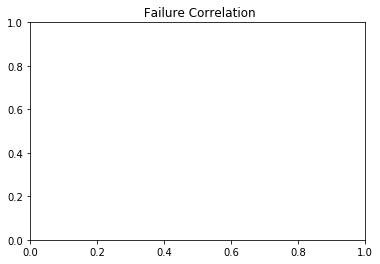

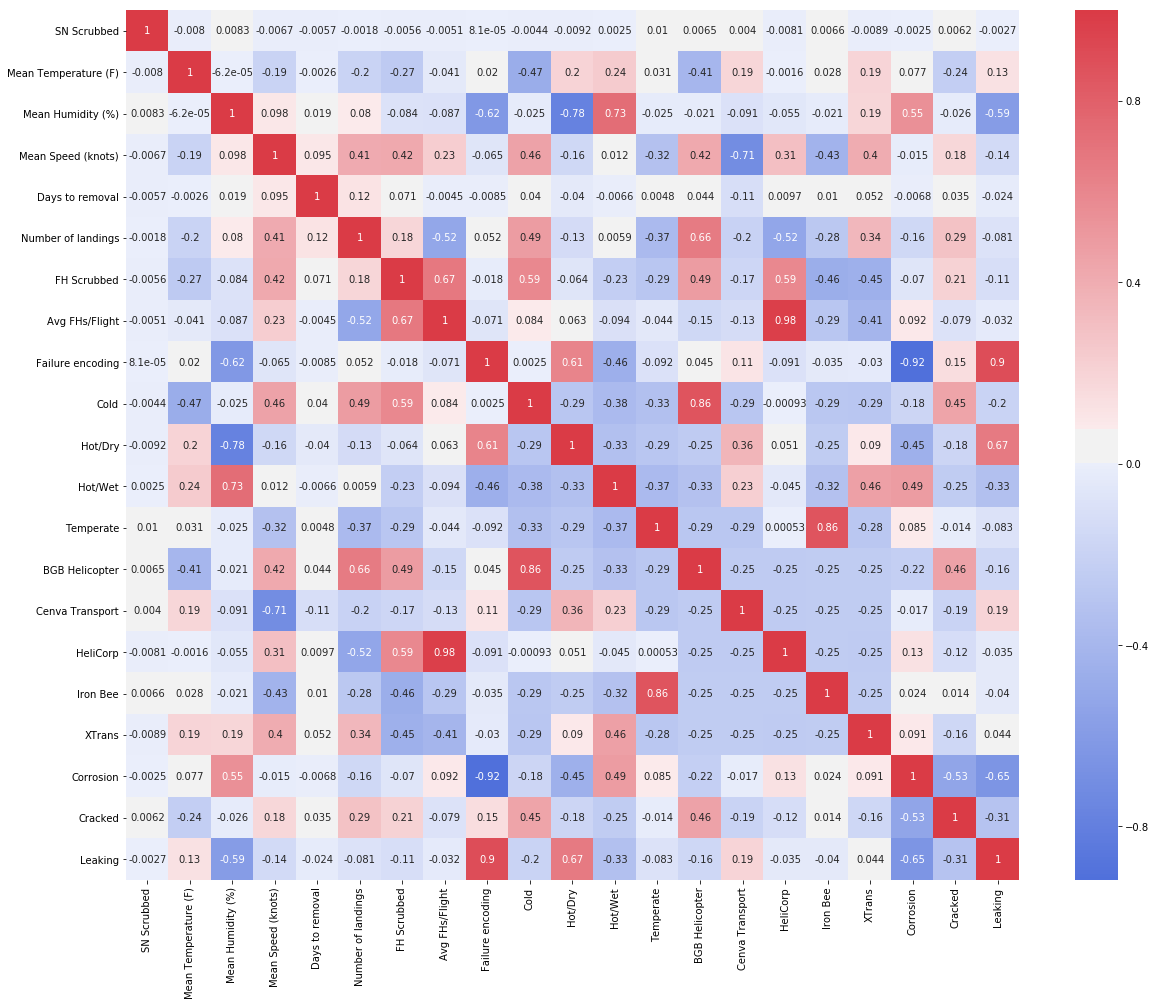

In [65]:
#Creating a heatmap using seaborn to identify any potential relationship between attributes
#This heat map takes Failure type as a lump sum so a dataframe for each failure type will need to be created and stored in a list to run a correlation for each one
import seaborn as sns
correl2 = corelation_analysis.corr()
ax=plt.axes()
plt.subplots(figsize=(20,16))
cmap = sns.diverging_palette(260, 10, as_cmap=True)
sns.heatmap(correl2,annot =True, xticklabels = correl2.columns.values, yticklabels = correl2.columns.values, cmap=cmap);
ax.set_title(' Failure Correlation');

# Regression Analysis - Initial Data Model

In [66]:
#Dataframe pre proccessing
#rail_df.head(5)
#print(failure_analysis.columns())
#fill = (trail_df["Failure Type"] == "Corrosion")
#trail_df.loc[fill, 'Failure Type'] = 1
#fill_1 = (trail_df["Failure Type"] =="Cracked")
#trail_df.loc[fill_1, "Failure Type"] = 2
#fill_2 = (trail_df["Failure Type"] =="Leaking")
#trail_df.loc[fill_2,"Failure Type"] = 3

#trail_df.head(5)
#Need to map failure type to 1,2,3 because im getting a size error when using dummies
# Recoding all string responses to numerical data in the first copy of the mushroom dataset. 
#failure_dict={'Corrosion':1,'Cracked':2,"Leaking":3}
#trail_df['Failure Type']= trail_df['Failure Type'].map(failure_dict)
#trail_df.head(10)

## Multi-Nomial Logistic Regresion

In [67]:
#We need to select the feature and target variables for the logistic regression analysis
#Creating a checkpoint dataframe for the modeling analysis
model_df = failure_analysis.copy(deep = True)

In [68]:
#selecting the explanatory variables for the model
X1 = failure_analysis[['Mean Temperature (F)',
               'Mean Humidity (%)',
               'Mean Speed (knots)',
               'Days to removal',
               'Number of landings',
               'FH Scrubbed',
               'Avg FHs/Flight',
               'Cold',
               'Hot/Dry',
               'Hot/Wet',
               'Temperate',
               'BGB Helicopter',
               'Cenva Transport',
               'HeliCorp',
               'Iron Bee',
               'XTrans']]
#Slecting the target Variables for the model
Y1 = failure_analysis[['Failure encoding']]

In [69]:
# Split the data into training and test sets 
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.40, random_state=2019)



In [70]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state = 2019 , multi_class = 'multinomial', solver = 'newton-cg')

# fit the model with data
logreg.fit(X1_train,Y1_train)

#
y_pred=logreg.predict(X1_test)

/Users/tmoroski/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tmoroski/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [71]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y1_test, y_pred)
cnf_matrix


array([[1796,  253,   76],
       [ 307,  455,   40],
       [ 295,  117,  661]])

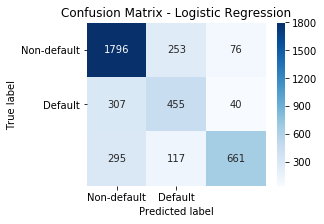

In [72]:
# Plot Confusion Matrix
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(Y1_test,logreg.predict(X1_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression");

In [73]:
print("Accuracy:",metrics.accuracy_score(Y1_test, y_pred))
print("Precision:",metrics.precision_score(Y1_test, y_pred, average=None))
print("Recall:",metrics.recall_score(Y1_test, y_pred, average =None))

Accuracy: 0.728
Precision: [0.74895746 0.55151515 0.85070785]
Recall: [0.84517647 0.56733167 0.61602982]


In [75]:
## 10-fold cross-validation to avoid over-fitting
scoring = 'accuracy'
#LR_cv_scores =cross_val_score(LR, X_resample, y_resample, cv=kfold, scoring=scoring)
cv_scores =cross_val_score(logreg, X1_test, Y1_test, cv=10, scoring=scoring)

print("Average 10-Fold CV Score: {}".format(round(np.mean(cv_scores),2)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),2)))

/Users/tmoroski/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tmoroski/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Users/tmoroski/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tmoroski/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Users/tmorosk

Average 10-Fold CV Score: 0.73 , Standard deviation: 0.02


/Users/tmoroski/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


# IMPROVED FEATURE SELECTION

In [25]:
#Breaking up the overarching dataframe into a dataframe for each failure categroy

In [26]:
# Feature extraction using Recursive Feature Elimination
model = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg', random_state = 2019)
rfe = RFE(model, 3)
fit = rfe.fit(X1, Y1)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))
feature_names = np.array(X1.columns)
print('Most important features (RFE): %s'% feature_names[fit.support_])

/Users/tmoroski/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tmoroski/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/tmoroski/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/tmoroski/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Users/tmoroski/anaconda3/lib/python3.7/site-packages/sklearn/u

Num Features: 3
Selected Features: [False False False False False False False  True  True  True False False
 False False False False]
Feature Ranking: [11  9 10 14 12 13  5  1  1  1  6  8  7  2  4  3]
Most important features (RFE): ['Cold' 'Hot/Dry' 'Hot/Wet']


/Users/tmoroski/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[0.09157517 0.13942514 0.09346802 0.08582212 0.09093606 0.08866607
 0.09367978 0.03220995 0.1438476  0.0630136  0.01138395 0.03677577
 0.01051161 0.00533398 0.00761109 0.00574009]


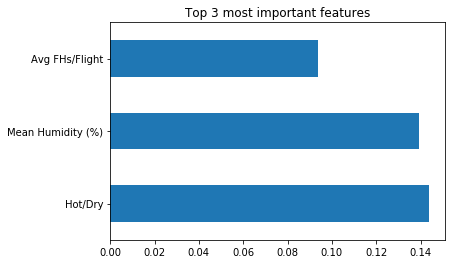

In [27]:
#Feature Importance among the variables using ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X1,Y1)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X1.columns)
#Check the top 3 features with highest score
feat_importances.nlargest(3).plot(kind='barh')
plt.title('Top 3 most important features')
plt.show()

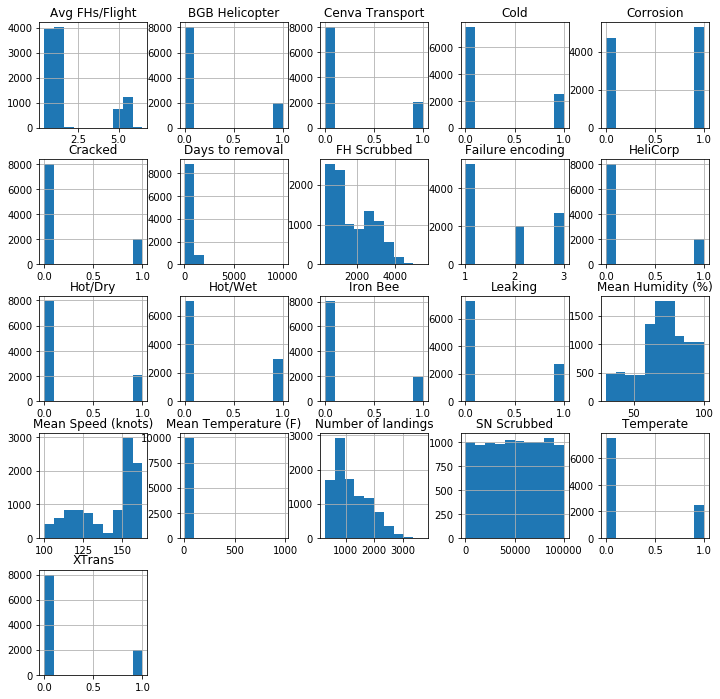

In [28]:
#Plot histogram of the numeric features
pd.DataFrame.hist(model_df, figsize = [12,12]);
#Aircraft operators, operator region are not continuous

In [29]:
#Logistic regression with improved features
#selecting the explanatory variables for the model
X2 = failure_analysis[['Mean Humidity (%)',
               'Avg FHs/Flight',
               'Cold',
               'Hot/Dry',
               'Hot/Wet',
               'Temperate',
               'BGB Helicopter',
               'Cenva Transport',
               'HeliCorp',
               'Iron Bee',
               'XTrans']]
#Slecting the target Variables for the model
Y2 = failure_analysis[['Failure encoding']]

In [30]:
# Split the data into training and test sets 
from sklearn.model_selection import train_test_split
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.40, random_state=2019)

In [31]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg2 = LogisticRegression(random_state = 2019 , multi_class = 'multinomial', solver = 'newton-cg')

# fit the model with data
logreg2.fit(X2_train,Y2_train)

#
y2_pred=logreg2.predict(X2_test)

/Users/tmoroski/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
print("Accuracy:",metrics.accuracy_score(Y2_test, y2_pred))
print("Precision:",metrics.precision_score(Y2_test, y2_pred, average=None))
print("Recall:",metrics.recall_score(Y2_test, y2_pred, average =None))

Accuracy: 0.7285
Precision: [0.74958264 0.55259976 0.85070785]
Recall: [0.84517647 0.56982544 0.61602982]


In [33]:
#Now there is a need to sharpen the model by reducing variables

array([[-0.60650657, -0.99554641, -1.37546462, -0.62348428],
       [-0.59744965, -0.97734902, -0.3164914 , -0.61198536],
       [-0.55482065, -0.81357253, -1.57665872, -0.42307458],
       ...,
       [ 2.03059815,  1.24197416,  0.53479759, -1.04401612],
       [-0.56463937, -0.93431978, -0.74267674, -0.61527077],
       [-0.28550056,  1.06407573,  0.7397776 ,  1.33133168]])

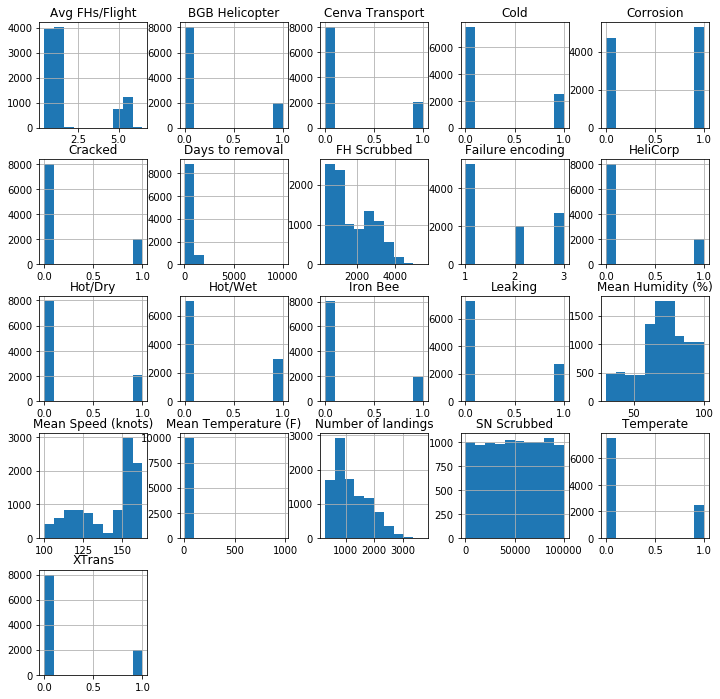

In [44]:
#Plot histogram of the numeric features
pd.DataFrame.hist(model_df, figsize = [12,12]);
#Aircraft operators, operator region are not continuous
#Scaling avf fhs/flight, FH scrubbed, mean speed and numner of landings
#Using the standardscaler function
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit_transform(failure_analysis[['Avg FHs/Flight',
                                   'FH Scrubbed',
                                   'Mean Speed (knots)',
                                   'Number of landings']].values)


In [45]:
#Logistic regression with improved features
#selecting the explanatory variables for the model
X3 = failure_analysis[['Mean Humidity (%)',
               'Avg FHs/Flight',
               'Cold',
               'Hot/Dry',
               'Hot/Wet',
               'Temperate',
               'BGB Helicopter',
               'Cenva Transport',
               'HeliCorp',
               'Iron Bee',
               'XTrans']]
#Slecting the target Variables for the model
Y3 = failure_analysis[['Failure encoding']]

In [46]:
# Split the data into training and test sets 
from sklearn.model_selection import train_test_split
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.40, random_state=2019)

In [47]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg3 = LogisticRegression(random_state = 2019 , multi_class = 'multinomial', solver = 'newton-cg')

# fit the model with data
logreg3.fit(X3_train,Y3_train)

#
y3_pred=logreg3.predict(X3_test)

/Users/tmoroski/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
print("Accuracy:",metrics.accuracy_score(Y3_test, y3_pred))
print("Precision:",metrics.precision_score(Y3_test, y3_pred, average=None))
print("Recall:",metrics.recall_score(Y3_test, y3_pred, average =None))

Accuracy: 0.7285
Precision: [0.74958264 0.55259976 0.85070785]
Recall: [0.84517647 0.56982544 0.61602982]


In [49]:
tree = DecisionTreeClassifier(max_depth=4, random_state=2019) 

# training the classifier
tree.fit(X1_train,Y1_train) 

# do our predictions on the test
y_pred = tree.predict(X1_test)
print('The accuracy of the Decision Tree using all variables is:',metrics.accuracy_score(Y1_test, y_pred).round(2))

The accuracy of the Decision Tree using all variables is: 0.73


In [36]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X1.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('failure_tree.png')
Image(graph.create_png())

IndexError: list index out of range

# Hyper Parameter Tuning

In [41]:
# Setup the hyperparameter grid
dual=[False]
C = [0.2,0.5,1.0,1.5,2.0,2.5]
max_iter=[10,15,20,25]
param_grid = dict(dual=dual,C=C,max_iter=max_iter)

import time

# Instantiate a logistic regression classifier
logreg3 = LogisticRegression(multi_class = 'multinomial',solver = 'newton-cg', penalty='l2', random_state = 2019)

# Instantiate the GridSearchCV object
logreg_cv = GridSearchCV(logreg3, param_grid , cv=10)

start_time = time.time()
# Fit it to the data
logreg_cv.fit(X2_train, Y2_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 

# Summarize results
print("Best: %f using %s" % (logreg_cv.best_score_, logreg_cv.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

/Users/tmoroski/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tmoroski/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Users/tmoroski/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tmoroski/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Users/tmorosk

Tuned Logistic Regression Parameters: {'C': 0.2, 'dual': False, 'max_iter': 10}
Best: 0.745833 using {'C': 0.2, 'dual': False, 'max_iter': 10}
Execution time: 35.25106501579285 ms


/Users/tmoroski/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Users/tmoroski/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tmoroski/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
